<a href="https://colab.research.google.com/github/nofal82/Entropy-IG/blob/main/v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import codecs

In [7]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd '/content/drive/My Drive'

/content/drive/My Drive


In [6]:
data = pd.read_excel('CUSTOMERREPORT Sep.21.xlsx', sheet_name='CUSTOMERREPORT', skiprows=4)

In [90]:
#Sender Name, Reciever Name, Date, transaction_type='Money Transfer, Agent Cash In', Amount, Sender Wallet type, Receiver Wallet type
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, format='%d/%m/%Y')

pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 100)
data.head()


,Sender Name,Sender Customer Phone Number,Reciever Name,Reciever Customer Phone Number,Created By Name,Date,Time,Transaction Type,Transaction Status,Amount,Transaction Reference,RRN,STAN 11,Sender Balance Before,Sender Balance After,Receiver Balance Before,Receiver Balance After,customer fees,sender Verified,Receiver Verified,Sender Wallet type,Receiver Wallet type,Authorization Number,Is Wallet Owner,Depositor Name,Depositor Id,Deposit Reason,Deposit Other Reason
0,ضيغم محمود حمدان ابو العدس,0798774039,OJM Merchant,NaN,NaN,2021-09-30,11:59:53 PM,International POS/ECommerce Purchase,Done,0.70,057300920212359538369007,127320501167,501167.0,1.032,0.332,NaN,NaN,0.0,Verified,not Verified,Person,Person,97175.0,NaN,NaN,NaN,NaN,NaN
1,OFF US,453001M00962799864950,abeer tayseer elayan alguzo,0796321135,NaN,2021-09-30,11:59:52 PM,Money Transfer,Done,47.00,533009202100000000002921244761302,NaN,NaN,NaN,NaN,0.07,47.07,0.0,not Verified,Verified,OFFUs,OFFUs,NaN,NaN,NaN,NaN,NaN,NaN
2,منال بسام خليل كريشان,0776578601,AFNAN SALAH HUSSEIN ALSOUDI,0775709031,0776578601,2021-09-30,11:59:52 PM,Money Transfer,Done,70.00,057300920212359528369006,NaN,NaN,127.323,57.323,0.00,70.00,0.0,Verified,not Verified,Person,Person,NaN,0.0,NaN,NaN,NaN,NaN
3,طارق بشير مصباح علي,0778343535,Prepaid Refill,NaN,0778343535,2021-09-30,11:59:50 PM,Prepaid Refill / Nos B Nos,Done,9.18,057300920212359508369004,NaN,NaN,9.770,0.590,NaN,NaN,0.0,Verified,Verified,Person,Person,NaN,0.0,NaN,NaN,NaN,NaN
4,نوره حسين العلي المشاقبه,0776405048,DATA BUNDLE MERCHANT,0777901654,0776405048,2021-09-30,11:59:44 PM,Merchant Payment,Done,1.16,057300920212359448369003,NaN,NaN,1.220,0.060,NaN,NaN,0.0,Verified,Verified,Person,Person,NaN,0.0,NaN,NaN,NaN,NaN


In [153]:
data_imp1 = data[['Sender Name', 'Reciever Name', 'Date', 'Transaction Type', 'Amount']]
data_imp2 = data[['Sender Name', 'Sender Customer Phone Number', 'Reciever Name', 'Reciever Customer Phone Number', 'Date', 'Transaction Type', 'Amount']]

data_imp3 = data[['Sender Customer Phone Number', 'Reciever Customer Phone Number', 'Date', 'Transaction Type', 'Amount']]

In [13]:
data_imp3['Date'].unique()
data_imp3.describe()
#data.plot(x='Date', y='Transaction Type')

,Amount
count,783475.000
mean,56.019
std,132.417
min,0.000
25%,4.500
50%,10.000
75%,45.000
max,10000.000


In [154]:
print(data_imp3['Date'].max(),data_imp3['Date'].min())
print(data_imp3.loc[data_imp2['Sender Customer Phone Number'] == '0798557954'])

2021-09-30 00:00:00 2021-09-01 00:00:00
       Sender Customer Phone Number Reciever Customer Phone Number       Date            Transaction Type   Amount
3541                     0798557954                     0770123008 2021-09-30              Money Transfer   28.000
4094                     0798557954                     0775271380 2021-09-30              Money Transfer    5.000
4371                     0798557954                     0772450665 2021-09-30              Money Transfer   10.000
8823                     0798557954                     0777232128 2021-09-30              Money Transfer    4.000
13841                    0798557954                     0777971972 2021-09-30              Money Transfer    5.850
...                             ...                            ...        ...                         ...      ...
624553                   0798557954                     0776917815 2021-09-07          Agent ATM Cash Out  500.000
652137                   0798557954     

In [138]:
plot1 = data_imp3.groupby(['Sender Customer Phone Number','Reciever Customer Phone Number', 'Transaction Type']).agg({'Amount': sum,'Date': max})
groupbyReport = data_imp3.groupby(['Sender Customer Phone Number', 'Reciever Customer Phone Number', 'Transaction Type', 'Date', 'Amount'])
plot2 = data_imp3.groupby(['Reciever Customer Phone Number', 'Sender Customer Phone Number', 'Amount', 'Date'])
plot2.head(100)
#groupbyReport.head(50)
#df2[df2['id'].isin(['SP.POP.TOTL','NY.GNP.PCAP.CD'])]

,Sender Customer Phone Number,Reciever Customer Phone Number,Date,Transaction Type,Amount
0,0798774039,NaN,2021-09-30,International POS/ECommerce Purchase,0.700
1,453001M00962799864950,0796321135,2021-09-30,Money Transfer,47.000
2,0776578601,0775709031,2021-09-30,Money Transfer,70.000
3,0778343535,NaN,2021-09-30,Prepaid Refill / Nos B Nos,9.180
4,0776405048,0777901654,2021-09-30,Merchant Payment,1.160
...,...,...,...,...,...
783462,0777431808,0772455659,2021-09-01,Money Transfer,200.000
783463,0777088087,0779751966,2021-09-01,Agent Cash In,215.000
783465,0776891555,0776899943,2021-09-01,Agent Cash In,0.010
783467,0777375975,individuals_subscription,2021-09-01,eFAWATEERcom,198.250


In [155]:
df = data_imp3.dropna(subset=['Sender Customer Phone Number', 'Reciever Customer Phone Number'])
df


,Sender Customer Phone Number,Reciever Customer Phone Number,Date,Transaction Type,Amount
1,453001M00962799864950,0796321135,2021-09-30,Money Transfer,47.000
2,0776578601,0775709031,2021-09-30,Money Transfer,70.000
4,0776405048,0777901654,2021-09-30,Merchant Payment,1.160
6,0777301046,0776893088,2021-09-30,Agent Cash In,1.000
8,0779404328,0779235344,2021-09-30,Money Transfer,7.350
...,...,...,...,...,...
783462,0777431808,0772455659,2021-09-01,Money Transfer,200.000
783463,0777088087,0779751966,2021-09-01,Agent Cash In,215.000
783465,0776891555,0776899943,2021-09-01,Agent Cash In,0.010
783467,0777375975,individuals_subscription,2021-09-01,eFAWATEERcom,198.250


In [181]:
df.loc[(df['Sender Customer Phone Number'] == '0777431808') & (df['Date'] == '2021-09-01') & (df['Transaction Type'] == 'Agent Cash In') & (df['Amount'] > 99) ]

,Sender Customer Phone Number,Reciever Customer Phone Number,Date,Transaction Type,Amount


In [176]:
df.loc[(df['Sender Customer Phone Number'] == '0777088087') & (df['Date'] == '2021-09-01') & (df['Transaction Type'] == 'Agent Cash In') & (df['Amount'] > 99) ]

,Sender Customer Phone Number,Reciever Customer Phone Number,Date,Transaction Type,Amount
770531,0777088087,0779815545,2021-09-01,Agent Cash In,130.0
773497,0777088087,0772490903,2021-09-01,Agent Cash In,201.0
781434,0777088087,0777207570,2021-09-01,Agent Cash In,247.0
781453,0777088087,0776672726,2021-09-01,Agent Cash In,230.0
781621,0777088087,0777701250,2021-09-01,Agent Cash In,213.0
781720,0777088087,0778210045,2021-09-01,Agent Cash In,206.0
781749,0777088087,0779404313,2021-09-01,Agent Cash In,205.0
781770,0777088087,0775560404,2021-09-01,Agent Cash In,204.0
781776,0777088087,0777232326,2021-09-01,Agent Cash In,203.0
781782,0777088087,0797335695,2021-09-01,Agent Cash In,202.0


In [167]:
import pandas as pd
def main():
    # Create a DataFrame object
    dfObj = pd.DataFrame(df, columns=['Sender Customer Phone Number', 'Reciever Customer Phone Number', 'Date', 'Transaction Type', 'Amount'])
    # Select all duplicate rows based on multiple column names in list
    duplicateRowsDF = dfObj[dfObj.duplicated(['Sender Customer Phone Number', 'Reciever Customer Phone Number'], keep=False)]
    print("Duplicate Rows based on 2 columns are:", duplicateRowsDF.head(50), sep='\n')
if __name__ == '__main__':
    main()

Duplicate Rows based on 2 columns are:
    Sender Customer Phone Number Reciever Customer Phone Number       Date   Transaction Type   Amount
2                     0776578601                     0775709031 2021-09-30     Money Transfer   70.000
4                     0776405048                     0777901654 2021-09-30   Merchant Payment    1.160
6                     0777301046                     0776893088 2021-09-30      Agent Cash In    1.000
8                     0779404328                     0779235344 2021-09-30     Money Transfer    7.350
11                    0779380091                     0779287001 2021-09-30      Agent Cash In    5.000
14                    0777003517                     0777901654 2021-09-30   Merchant Payment    1.160
17                    0781020652                     0792109391 2021-09-30     Money Transfer   15.000
19                    0776899941                     0776891178 2021-09-30     Money Transfer    0.001
28         453001M00962775772709  

,Reciever Customer Phone Number,Transaction Type,Date,Amount,counts
1163,0770317315,ATM Cash Out,2021-09-01,250.0,17
1178,0770317315,ATM Cash Out,2021-09-02,100.0,10
1190,0770317315,ATM Cash Out,2021-09-02,250.0,25
1231,0770317315,ATM Cash Out,2021-09-04,250.0,16
1247,0770317315,ATM Cash Out,2021-09-05,100.0,10
1255,0770317315,ATM Cash Out,2021-09-05,250.0,17
1276,0770317315,ATM Cash Out,2021-09-06,200.0,10
1279,0770317315,ATM Cash Out,2021-09-06,250.0,20
1293,0770317315,ATM Cash Out,2021-09-07,100.0,13
1301,0770317315,ATM Cash Out,2021-09-07,200.0,10


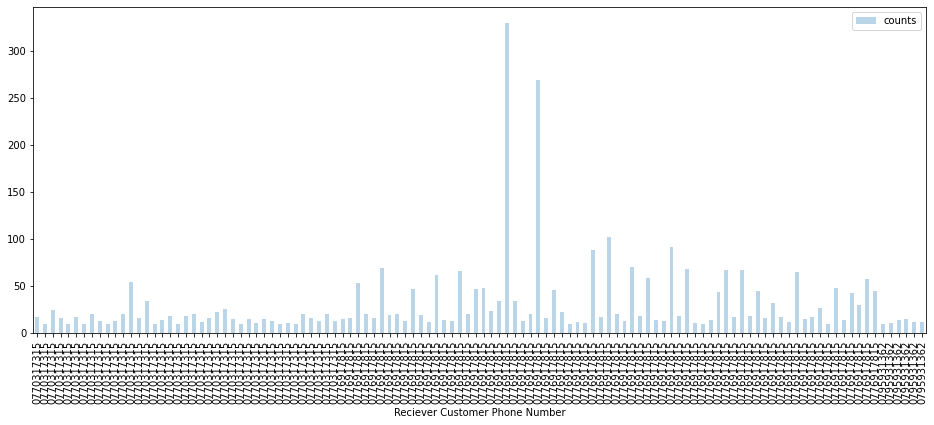

In [151]:
duplicateRowsDF = df[df.duplicated(['Sender Customer Phone Number', 'Reciever Customer Phone Number'])]
#groupbyrx = duplicateRowsDF[duplicateRowsDF['Transaction Type']!= 'Money Transfer'].groupby(['Reciever Customer Phone Number', 'Transaction Type', 'Date', 'Amount']).size().reset_index(name='counts')
groupbyrx = duplicateRowsDF.loc[(duplicateRowsDF['Transaction Type']!= 'Money Transfer') &
                                (duplicateRowsDF['Transaction Type']!= 'eFAWATEERcom') & 
                                (duplicateRowsDF['Transaction Type']!= 'Merchant Payment')].groupby(['Reciever Customer Phone Number', 'Transaction Type', 'Date', 'Amount']).size().reset_index(name='counts')

amountrx = groupbyrx.loc[(groupbyrx['Amount'] > 99) &(groupbyrx['counts'] >= 10)]
groupbytx = duplicateRowsDF.loc[(duplicateRowsDF['Transaction Type']!= 'Money Transfer')  & (duplicateRowsDF['Transaction Type']!= 'eFAWATEERcom') & (duplicateRowsDF['Transaction Type']!= 'Merchant Payment')].groupby(['Sender Customer Phone Number', 'Transaction Type', 'Date', 'Amount']).size().reset_index(name='counts')
amounttx = groupbytx.loc[(groupbytx['Amount'] > 99) & (groupbytx['counts'] >= 10)]
amountrx.plot(x='Reciever Customer Phone Number', y='counts', kind='bar', alpha=0.3, figsize=(16, 6))

amountrx.head(50)


In [126]:
amounttx.head(50)

,Sender Customer Phone Number,Transaction Type,Date,Amount,counts
79,0770052508,Agent Cash In,2021-09-19,101.00,10
137,0770104500,Agent Cash In,2021-09-26,100.00,10
396,0770297739,Agent Cash In,2021-09-02,201.00,13
403,0770297739,Agent Cash In,2021-09-03,201.00,10
409,0770297739,Agent Cash In,2021-09-04,201.00,21
414,0770297739,Agent Cash In,2021-09-05,201.00,17
425,0770297739,Agent Cash In,2021-09-06,201.00,29
427,0770297739,Agent Cash In,2021-09-07,201.00,34
431,0770297739,Agent Cash In,2021-09-08,201.00,43
443,0770297739,Agent Cash In,2021-09-10,201.00,40


In [ ]:
plot1 = data_imp3.groupby([' Sender Customer Phone Number','Transaction Type'])['Transaction Type'].value_counts().to_frame()
plot2 = data_imp2.groupby(["Sender Name", "Transaction Type"], as_index=False)["Amount"].count()
groupbyReport = data.groupby(['Sender Name', 'Transaction Type', 'Date', 'Amount']).size().reset_index(name='counts')
countgr = groupbyReport.loc[(groupbyReport['counts'] >= 10) & (groupbyReport['Amount'] > 99)]

countgr.shape
grouprx = data.groupby(['Reciever Name', 'Transaction Type', 'Date', 'Amount']).size().reset_index(name='counts')
grouprxx = grouprx.loc[(groupbyReport['counts'] >= 10) & (groupbyReport['Amount'] > 99)]
grouprxx.shape
#df2[df2['id'].isin(['SP.POP.TOTL','NY.GNP.PCAP.CD'])]

In [ ]:
tty = countgr['Transaction Type'].values.shape
dt = countgr['Date'].values.shape
print (f"tty is {tty} \n and dt is {dt}")

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(16, 10))

# Add x-axis and y-axis
ax.scatter(countgr['Date'].values,
        countgr['Amount'].values,
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Amount",
       title="Amount Per Day")

plt.savefig('AmountPerDate.png')
plt.show()
plt.tight_layout()

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(16, 10))

# Add x-axis and y-axis
ax.scatter(x=countgr['Date'].values,
        y=countgr['Transaction Type'].values,
        color='purple', alpha=0.5)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Transaction Type",
       title="Transaction Type Per Date")

plt.savefig('TransactionTypePerDate.png')
plt.show()
plt.tight_layout()

In [ ]:
sns.pairplot(countgr)

In [ ]:

#countgr.plot(x="Date", y=["Amount", "Transaction Type"], kind="bar", figsize=(9, 8))
#countgr.to_csv('countgr1.csv', mode='a', encoding="utf8")
sns.pairplot(grouprxx)

In [ ]:
#grouprxx
rx_df = grouprxx.groupby(['Reciever Name', 'Transaction Type']).agg({'Amount': sum,'Date': max})
tx_df = countgr.groupby(['Sender Name', 'Transaction Type']).agg({'Amount': sum,'Date': max})



In [ ]:
tx_df

,,Amount,Date
Sender Name,Transaction Type,,
ABDALLAH MOHAMMAD AHMAD ALHAMAD,eFAWATEERcom,999.000,2021-09-17
AL Aman Fund,Salaries,150.000,2021-09-23
ALI AMJED OKLEH ALRAWASHDEH,eFAWATEERcom,999.000,2021-09-26
ALWAZIR,Salaries,450.000,2021-09-07
Efawateercom Biller1,eFAWATEERcom Biller Cash In,75759.000,2021-09-30
GJU Edu Syria,Salaries,1238.190,2021-09-27
German Jordanian Uni,Salaries,746.750,2021-09-30
HABEEB MAHMOUD IBRAHIM RAMADNEH,eFAWATEERcom,999.000,2021-09-27
HR wallet,Salaries,920.000,2021-09-27


In [ ]:
rx_df

,,Amount,Date
Reciever Name,Transaction Type,,
ABED ALJAWAD RAMIZ ALOWAISH,Agent Cash In,5.00,2021-09-27
ASEEL SAMER IBRAHIM ABDALLAH,Agent Cash In,202.00,2021-09-11
Abu sheikhah irbed,Agent Cash Out,59.00,2021-09-02
Al Ashrafieh,Agent Cash Out,499.00,2021-09-25
Al Mafraq,Agent Cash Out,53.00,2021-09-13
...,...,...,...
محمد احمد محمد بني عبدالرحمن,eFAWATEERcom Biller Cash In,32.55,2021-09-21
محمد محمود حسين حسين,Agent Cash In,10.00,2021-09-02
يزن محمد عقيل المناصير,Agent Cash In,10.00,2021-09-22


In [56]:
###custom function
def groupby_count(x):
    return x.count()
def transaction_duration(x):
    return (x.max()-x.min()).days
def avg_frequency(x):
    return (x.max()-x.min()).days/x.count()

groupby_count.__name__='count'
transaction_duration.__name__='transaction_duration'
avg_frequency.__name__='transaction_frequancy'


plot2 = data_imp3.groupby(['Reciever Customer Phone Number', 'Sender Customer Phone Number']).agg({'Amount': count,'Date': max})

NameError: ignored

In [ ]:
summary_df_tx = tx_df.reset_index().groupby('Sender Name').agg({
    'Amount': [min, max, sum, groupby_count],
    'Date': [min, max, transaction_duration, avg_frequency]
})
summary_df_rx = rx_df.reset_index().groupby('Reciever Name').agg({
    'Amount': [min, max, sum, groupby_count],
    'Date': [min, max, transaction_duration, avg_frequency]
})

In [ ]:
summary_df_tx

In [ ]:
summary_df_rx

Amount                                   Date                                                      
                                                   min        max        sum count        min        max transaction_duration transaction_frequancy
Reciever Name                                                                                                                                      
ABED ALJAWAD RAMIZ  ALOWAISH                     5.000      5.000      5.000   1.0 2021-09-27 2021-09-27                    0                 0.000
ASEEL SAMER IBRAHIM ABDALLAH                   202.000    202.000    202.000   1.0 2021-09-11 2021-09-11                    0                 0.000
Abu sheikhah irbed                              59.000     59.000     59.000   1.0 2021-09-02 2021-09-02                    0                 0.000
Al Ashrafieh                                   499.000    499.000    499.000   1.0 2021-09-25 2021-09-25                    0                 0.000
Al Mafraq                                       53.000     53.000     53.000   1.0 2021-09-13 2021-09-13                    0                 0.000
Efawateercom                                 22845.152  22845.152  22845.152   1.0 2021-09-29 2021-09-29                    0                 0.000
Franchise-Tabarbour                             35.500     35.500     35.500   1.0 2021-09-28 2021-09-28                    0                 0.000
Franshise-AlJabal AlShamali                   1518.605   1518.605   1518.605   1.0 2021-09-15 2021-09-15                    0                 0.000
JEHAN MUSA ABDALLAH SULEIMAN                     7.750      7.750      7.750   1.0 2021-09-09 2021-09-09                    0                 0.000
JOHUD                                           10.000     10.000     10.000   1.0 2021-09-29 2021-09-29                    0                 0.000
KHALED  JABIR  NAWAF  ALHMOUD                   58.000     58.000     58.000   1.0 2021-09-11 2021-09-11                    0                 0.000
LAITH ELYAS ESSA ALRABADI                      100.100    100.100    100.100   1.0 2021-09-28 2021-09-28                    0                 0.000
MOHAMMAD ANWER ALI AYASRAH                     620.880    620.880    620.880   1.0 2021-09-14 2021-09-14                    0                 0.000
MOHAMMAD AQIL AYED ALZUBI                       50.000     50.000     50.000   1.0 2021-09-29 2021-09-29                    0                 0.000
MOHAMMAD AREF MOHAMMAD SULEIM                   17.760     17.760     17.760   1.0 2021-09-28 2021-09-28                    0                 0.000
Msharbash                                      506.500    506.500    506.500   1.0 2021-09-27 2021-09-27                    0                 0.000
Mulham  Ali  Suliman  Alhadid                   61.700     61.700     61.700   1.0 2021-09-14 2021-09-14                    0                 0.000
Muslim  Hilal  FATEH ALBAB Muhammad            103.000    103.000    103.000   1.0 2021-09-20 2021-09-20                    0                 0.000
Mustafa Emad Falah atoum                       110.000    110.000    110.000   1.0 2021-09-22 2021-09-22                    0                 0.000
NABIL ABDEL MAJEED  ABDEL MAJEED                20.000     20.000     20.000   1.0 2021-09-22 2021-09-22                    0                 0.000
NADYA FATHI MAHMOUD ALQDERIE                    77.500     77.500     77.500   1.0 2021-09-07 2021-09-07                    0                 0.000
NAEL ABDALGHANI IBRAHIM JABER                    2.500      2.500      2.500   1.0 2021-09-18 2021-09-18                    0                 0.000
NANCY ISSA YOUSEF  HATTAR                       50.000     50.000     50.000   1.0 2021-09-08 2021-09-08                    0                 0.000
NARGIS HELAL HELAL UDDIN                         9.280      9.280      9.280   1.0 2021-09-27 2021-09-27                    0                 0.000
NASER  MOHAMMAD HUSSEIN ALTWASSI                50.0

In [ ]:
summary_df_tx.columns=['_'.join(col).lower() for col in summary_df_tx.columns] 
summary_df_rx.columns=['_'.join(col).lower() for col in summary_df_rx.columns] 

,a_m_o_u_n_t___m_i_n,a_m_o_u_n_t___m_a_x,a_m_o_u_n_t___s_u_m,a_m_o_u_n_t___c_o_u_n_t,d_a_t_e___m_i_n,d_a_t_e___m_a_x,d_a_t_e___t_r_a_n_s_a_c_t_i_o_n___d_u_r_a_t_i_o_n,d_a_t_e___t_r_a_n_s_a_c_t_i_o_n___f_r_e_q_u_a_n_c_y
Reciever Name,,,,,,,,
ABED ALJAWAD RAMIZ ALOWAISH,5.000,5.000,5.000,1.0,2021-09-27,2021-09-27,0,0.000
ASEEL SAMER IBRAHIM ABDALLAH,202.000,202.000,202.000,1.0,2021-09-11,2021-09-11,0,0.000
Abu sheikhah irbed,59.000,59.000,59.000,1.0,2021-09-02,2021-09-02,0,0.000
Al Ashrafieh,499.000,499.000,499.000,1.0,2021-09-25,2021-09-25,0,0.000
Al Mafraq,53.000,53.000,53.000,1.0,2021-09-13,2021-09-13,0,0.000
Efawateercom,22845.152,22845.152,22845.152,1.0,2021-09-29,2021-09-29,0,0.000
Franchise-Tabarbour,35.500,35.500,35.500,1.0,2021-09-28,2021-09-28,0,0.000
Franshise-AlJabal AlShamali,1518.605,1518.605,1518.605,1.0,2021-09-15,2021-09-15,0,0.000
JEHAN MUSA ABDALLAH SULEIMAN,7.750,7.750,7.750,1.0,2021-09-09,2021-09-09,0,0.000


In [ ]:
summary_df_tx.groupby('sales_count').count()['sales_avg'][:20]

In [ ]:
#print(data['Transaction Type'].shape)
sv = data.groupby('Date')['Transaction Type'].value_counts().to_frame()
data['Date'].value_counts()[:30].plot(kind='barh')
plt.tight_layout()

In [ ]:
tty = data['Transaction Type'].values.shape
dt = data['Date'].values.shape
print (f"tty is {tty} \n and dt is {dt}")
#(783475,)

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(16, 10))

# Add x-axis and y-axis
ax.scatter(data['Date'].values,
        data['Transaction Type'].values,
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Transaction Type",
       title="Transaction Type Counts")

plt.savefig('TransactionTypePerDate.png')
plt.show()
plt.tight_layout()